In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf # Asi usaremos la notacion de formula
import statsmodels.api as sm # asi usaremos la notacion de sklearn
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#### Vamos a incorporar los nuevos resultados


ciudades_sin_otros = pd.read_csv(r"C:/projectos/manifolds/ciudades/datos/datos_completos/ciudades_paisaje_sin_otros.csv")
ciudades_filter = pd.read_csv(r"C:/projectos/manifolds/ciudades/datos/datos_completos/ciudades_paisaje_filter.csv")

In [4]:
ciudades_sin_otros.columns

Index(['Unnamed: 0', 'PR', 'PRD', 'SHDI', 'SIDI', 'MSIDI', 'SHEI', 'SIEI',
       'MSIEI', 'IEI', 'index', 'ID', 'index.1', 'NP', 'DIVISION', 'SPLIT',
       'MESH', 'variable', 'COM', 'ED_SING', 'EQUIP', 'IND', 'OCIO', 'OFI',
       'RES_PLU', 'RES_UNI', 'SIN_EDIF', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36'],
      dtype='object')

In [17]:
ciudades_sin_otros = ciudades_sin_otros.loc[:,['PR', 'PRD', 'SHDI', 'SIDI', 'MSIDI', 'SHEI', 'SIEI',
       'MSIEI', 'IEI', 'index', 'index.1', 'NP', 'DIVISION', 'SPLIT',
       'MESH', 'variable', 'COM', 'ED_SING', 'EQUIP', 'IND', 'OCIO', 'OFI',
       'RES_PLU', 'RES_UNI', 'SIN_EDIF']]

In [10]:
ciudades_sin_otros.describe().T

,count,mean,std,min,25%,50%,75%,max
PR,72.00,8.07,0.26,8.00,8.00,8.00,8.00,9.00
PRD,72.00,0.85,0.58,0.04,0.41,0.74,1.18,2.90
SHDI,72.00,1.65,5.43,0.62,0.68,0.74,0.85,45.95
SIDI,72.00,0.71,0.14,0.04,0.71,0.75,0.77,0.80
MSIDI,72.00,1.30,0.32,0.04,1.24,1.39,1.49,1.62
SHEI,72.00,0.71,0.13,0.06,0.69,0.75,0.78,0.82
SIEI,72.00,0.81,0.16,0.05,0.81,0.86,0.89,0.92
MSIEI,72.00,0.62,0.15,0.02,0.60,0.67,0.72,0.78
IEI,72.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ID,72.00,35.50,20.93,0.00,17.75,35.50,53.25,71.00


In [18]:
ciudades_filter = ciudades_filter.loc[:,['PR', 'PRD', 'SHDI', 'SIDI', 'MSIDI', 'SHEI', 'SIEI',
       'MSIEI', 'IEI', 'index', 'index.1', 'NP', 'DIVISION', 'SPLIT',
       'MESH', 'variable', 'COM', 'ED_SING', 'EQUIP', 'IND', 'OCIO', 'OFI',
       'RES_PLU', 'RES_UNI']]

In [14]:
ciudades_filter.describe().T

,count,mean,std,min,25%,50%,75%,max
PR,72.00,8.07,0.26,8.00,8.00,8.00,8.00,9.00
PRD,72.00,0.85,0.58,0.04,0.41,0.74,1.18,2.90
SHDI,72.00,1.65,5.43,0.62,0.68,0.74,0.85,45.95
SIDI,72.00,0.71,0.14,0.04,0.71,0.75,0.77,0.80
MSIDI,72.00,1.30,0.32,0.04,1.24,1.39,1.49,1.62
SHEI,72.00,0.71,0.13,0.06,0.69,0.75,0.78,0.82
SIEI,72.00,0.81,0.16,0.05,0.81,0.86,0.89,0.92
MSIEI,72.00,0.62,0.15,0.02,0.60,0.67,0.72,0.78
IEI,72.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ID,72.00,35.50,20.93,0.00,17.75,35.50,53.25,71.00


# Histograma variables sin otros

C:\Users\crist\AppData\Local\Temp\ipykernel_12092\1130906694.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = ciudades_sin_otros.hist(ax= ax)


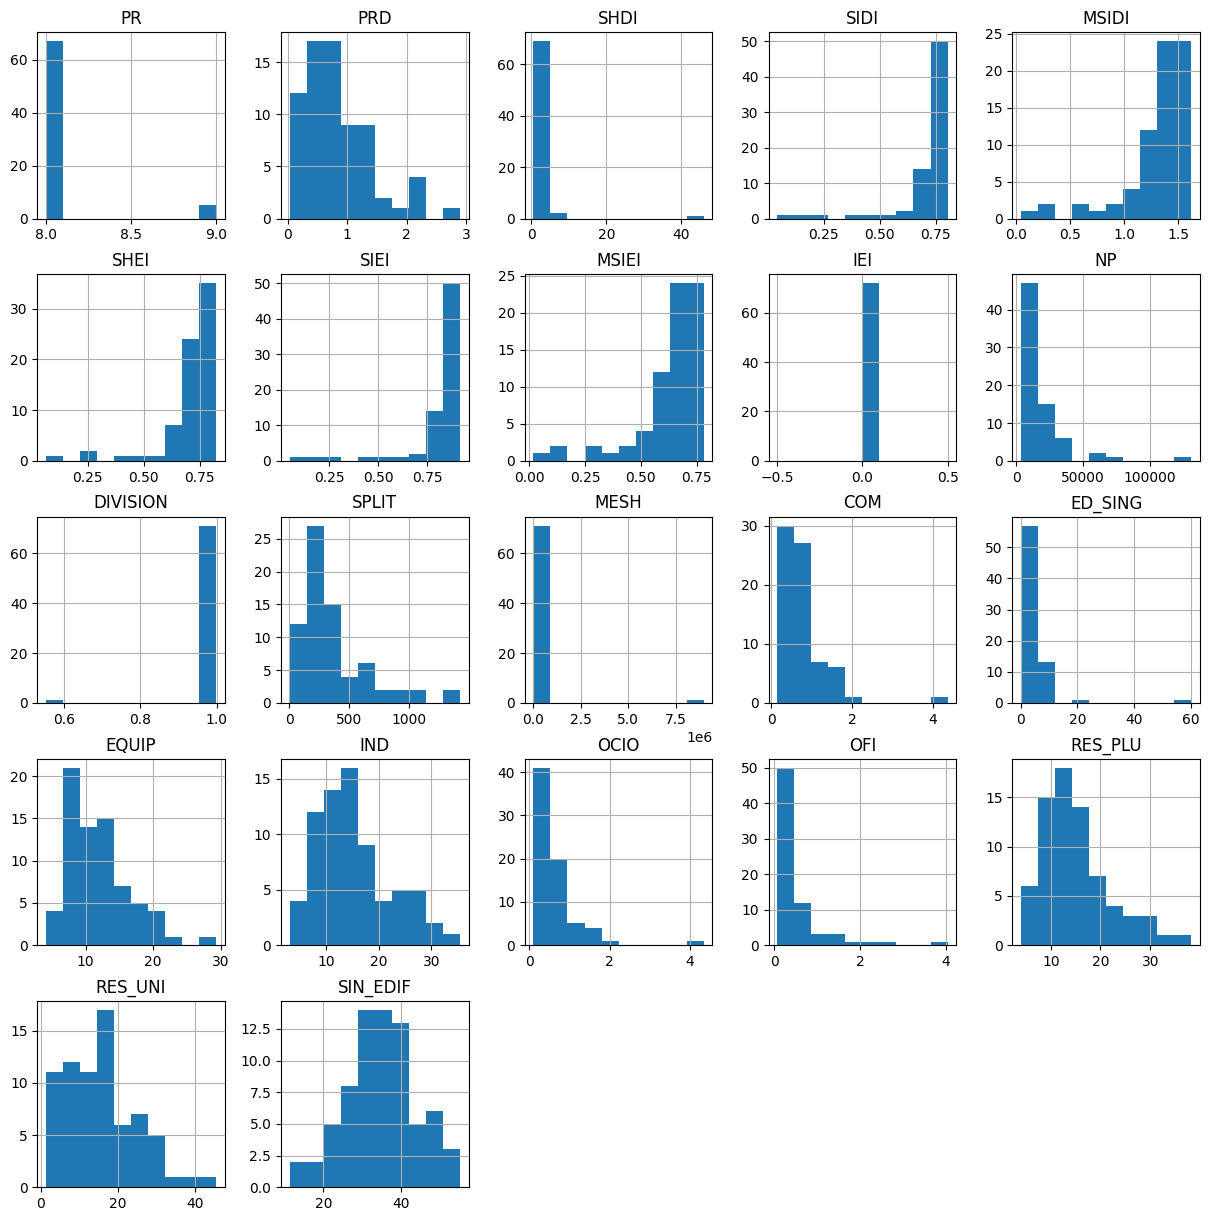

In [19]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = ciudades_sin_otros.hist(ax= ax)

C:\Users\crist\AppData\Local\Temp\ipykernel_12092\594993060.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = ciudades_filter.hist(ax=ax)


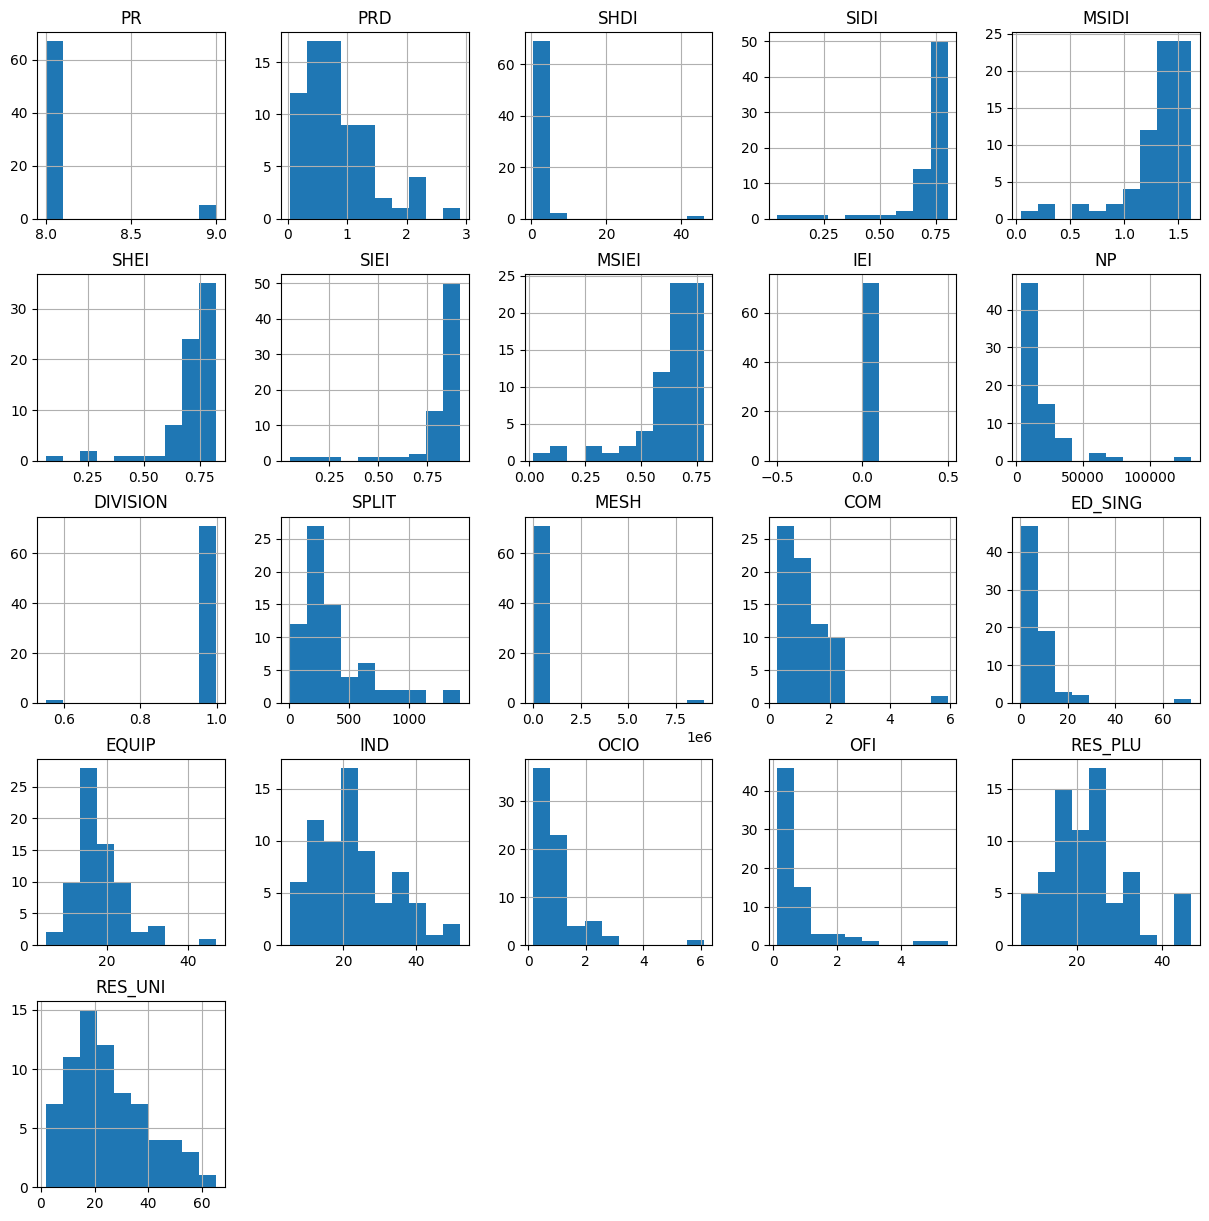

In [21]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = ciudades_filter.hist(ax=ax)

In [28]:
ciudades_sin_otros.loc[:,['PR', 'PRD', 'SHDI', 'SIDI', 'MSIDI', 'SHEI', 'SIEI',
       'MSIEI', 'NP', 'DIVISION', 'SPLIT',
       'MESH', 'COM', 'ED_SING', 'EQUIP', 'IND', 'OCIO', 'OFI',
       'RES_PLU', 'RES_UNI', 'SIN_EDIF']].corr().style.background_gradient(cmap = 'plasma')

,PR,PRD,SHDI,SIDI,MSIDI,SHEI,SIEI,MSIEI,NP,DIVISION,SPLIT,MESH,COM,ED_SING,EQUIP,IND,OCIO,OFI,RES_PLU,RES_UNI,SIN_EDIF
PR,1.000000,-0.243484,0.577171,-0.806945,-0.751271,-0.797166,-0.812206,-0.762806,0.527951,0.028932,-0.109002,0.040658,0.281393,-0.068675,0.235614,-0.291444,0.000656,0.518445,0.132184,0.051453,-0.042456
PRD,-0.243484,1.000000,-0.098057,0.266931,0.310843,0.258659,0.268405,0.313716,-0.516885,0.066219,-0.376887,-0.127732,0.098258,0.009227,0.199181,0.129178,0.003588,-0.150270,0.238712,-0.317805,-0.070355
SHDI,0.577171,-0.098057,1.000000,-0.732303,-0.618612,-0.722029,-0.730270,-0.615071,0.024744,-0.016197,-0.090373,0.028937,0.700911,-0.057075,0.193075,-0.188833,0.040895,0.697441,0.006299,0.148625,-0.155079
SIDI,-0.806945,0.266931,-0.732303,1.000000,0.973923,0.993341,0.999949,0.973182,-0.311868,0.215138,0.042775,-0.270493,-0.394193,-0.094039,-0.199143,0.279742,0.039161,-0.525360,-0.034631,-0.195635,0.240564
MSIDI,-0.751271,0.310843,-0.618612,0.973923,1.000000,0.979296,0.974228,0.999737,-0.362375,0.246887,-0.038779,-0.307185,-0.311376,-0.094106,-0.128814,0.254950,0.088946,-0.433061,-0.021105,-0.237861,0.241858
SHEI,-0.797166,0.258659,-0.722029,0.993341,0.979296,1.000000,0.993394,0.978763,-0.299658,0.205693,0.031636,-0.260522,-0.374313,-0.067501,-0.202220,0.252568,0.080016,-0.478823,-0.034950,-0.211901,0.251903
SIEI,-0.812206,0.268405,-0.730270,0.999949,0.974228,0.993394,1.000000,0.973717,-0.317411,0.213840,0.042820,-0.269691,-0.391965,-0.093068,-0.198459,0.281021,0.039588,-0.525225,-0.035524,-0.194720,0.237997
MSIEI,-0.762806,0.313716,-0.615071,0.973182,0.999737,0.978763,0.973717,1.000000,-0.373546,0.243987,-0.038377,-0.305196,-0.307325,-0.092046,-0.126879,0.257834,0.089702,-0.433023,-0.022418,-0.235807,0.235531
NP,0.527951,-0.516885,0.024744,-0.311868,-0.362375,-0.299658,-0.317411,-0.373546,1.000000,0.096315,0.329597,0.004837,0.014155,-0.100841,-0.119933,-0.326127,0.097178,0.290452,0.310618,0.152245,-0.022379
DIVISION,0.028932,0.066219,-0.016197,0.215138,0.246887,0.205693,0.213840,0.243987,0.096315,1.000000,0.201571,-0.991479,0.104828,-0.899375,0.188017,0.088484,0.088494,0.055569,0.156465,0.194835,0.223355


In [25]:
ciudades_filter.loc[:,['PR', 'PRD', 'SHDI', 'SIDI', 'MSIDI', 'SHEI', 'SIEI',
       'MSIEI', 'NP', 'DIVISION', 'SPLIT',
       'MESH', 'COM', 'ED_SING', 'EQUIP', 'IND', 'OCIO', 'OFI',
       'RES_PLU', 'RES_UNI']].corr().style.background_gradient(cmap = "plasma")

,PR,PRD,SHDI,SIDI,MSIDI,SHEI,SIEI,MSIEI,NP,DIVISION,SPLIT,MESH,COM,ED_SING,EQUIP,IND,OCIO,OFI,RES_PLU,RES_UNI
PR,1.000000,-0.243484,0.577171,-0.806945,-0.751271,-0.797166,-0.812206,-0.762806,0.527951,0.028932,-0.109002,0.040658,0.260674,-0.087718,0.232703,-0.298355,-0.027025,0.457088,0.121506,0.051267
PRD,-0.243484,1.000000,-0.098057,0.266931,0.310843,0.258659,0.268405,0.313716,-0.516885,0.066219,-0.376887,-0.127732,0.079947,0.033209,0.162880,0.145037,0.001934,-0.143009,0.217196,-0.330245
SHDI,0.577171,-0.098057,1.000000,-0.732303,-0.618612,-0.722029,-0.730270,-0.615071,0.024744,-0.016197,-0.090373,0.028937,0.668631,-0.081538,0.147154,-0.219029,0.013992,0.605999,-0.041089,0.094339
SIDI,-0.806945,0.266931,-0.732303,1.000000,0.973923,0.993341,0.999949,0.973182,-0.311868,0.215138,0.042775,-0.270493,-0.335667,-0.033669,-0.143574,0.333918,0.082173,-0.436358,0.048882,-0.146652
MSIDI,-0.751271,0.310843,-0.618612,0.973923,1.000000,0.979296,0.974228,0.999737,-0.362375,0.246887,-0.038779,-0.307185,-0.249695,-0.022067,-0.065022,0.313034,0.131080,-0.351403,0.068358,-0.199103
SHEI,-0.797166,0.258659,-0.722029,0.993341,0.979296,1.000000,0.993394,0.978763,-0.299658,0.205693,0.031636,-0.260522,-0.309047,-0.001236,-0.139778,0.312010,0.123926,-0.385993,0.054398,-0.163758
SIEI,-0.812206,0.268405,-0.730270,0.999949,0.974228,0.993394,1.000000,0.973717,-0.317411,0.213840,0.042820,-0.269691,-0.333874,-0.032951,-0.143459,0.334616,0.082453,-0.436542,0.047121,-0.146669
MSIEI,-0.762806,0.313716,-0.615071,0.973182,0.999737,0.978763,0.973717,1.000000,-0.373546,0.243987,-0.038377,-0.305196,-0.246769,-0.020689,-0.064468,0.314457,0.131444,-0.352114,0.064938,-0.199258
NP,0.527951,-0.516885,0.024744,-0.311868,-0.362375,-0.299658,-0.317411,-0.373546,1.000000,0.096315,0.329597,0.004837,0.017915,-0.119769,-0.150633,-0.342681,0.084683,0.250103,0.343513,0.154938
DIVISION,0.028932,0.066219,-0.016197,0.215138,0.246887,0.205693,0.213840,0.243987,0.096315,1.000000,0.201571,-0.991479,0.124067,-0.842898,0.224986,0.122286,0.100266,0.061492,0.207473,0.200654


## Es probable que para que las correlaciones salgan más altas tengas que escalar los datos, y esto también sera necesario para hacer el análisis factorial.